In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,datetime
from IPython.display import Image

In [ ]:
data=pd.read_csv("/content/drive/My Drive/dog/data/labels.csv")
data.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [ ]:
image_names=[]
for i in data["id"]:
  image_names.append(i)


In [ ]:
len(image_names)

10222

In [ ]:
image_path=[]
for i in image_names:
  path="/content/drive/My Drive/dog/data/train/"+i+".jpg"
  image_path.append(path)


In [ ]:
image_path[:5]

['/content/drive/My Drive/dog/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/My Drive/dog/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/My Drive/dog/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/My Drive/dog/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/My Drive/dog/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg']

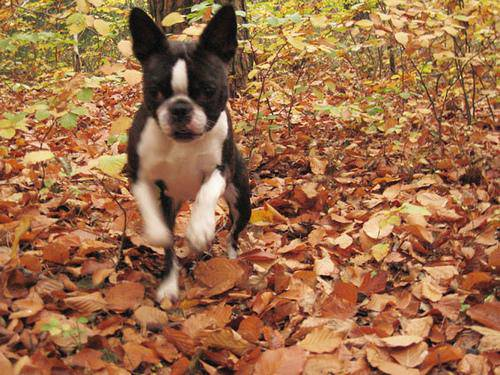

In [ ]:
Image(image_path[0])

In [ ]:
## coverting all images to jpeg in rgb channel only and then to float and of size (224,224)

def path_to_image(i):
  img=tf.io.read_file(i)
  img=tf.image.decode_jpeg(img,channels=3)
  img=tf.image.convert_image_dtype(img,dtype=tf.float32)
  img=tf.image.resize(img,size=(224,224))
  return img


In [ ]:
breeds=data["breed"]
unique_breeds=np.unique(breeds)
len(unique_breeds)

120

In [ ]:
breeds=data["breed"]
unique_breeds=np.unique(breeds)
boolean_labels=[]
for i in breeds:
  boolean_labels.append(i==unique_breeds)

In [ ]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
labels=[i.astype(int) for i in boolean_labels]

In [ ]:
labels[:2]

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]

In [ ]:
## creating x and y
x=image_path
y=labels

In [ ]:
## function to convert image and labels to tensor tuple
def tensor_tuple(imagepath,label):
  img=path_to_image(imagepath)
  return img,label


In [ ]:
## creating function to convaert data into batches
def create_batch(x,y):
  data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
  data_batch=data.map(tensor_tuple).batch(32)
  return data_batch


In [ ]:
full_databatch=create_batch(x,y)

In [ ]:
## creating model using keras and mobilenetv2 
def create_model():
  model=tf.keras.Sequential([hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"),tf.keras.layers.Dense(units=120,activation="softmax")])
  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
  model.build([None,224,224,3])
  return model

In [ ]:
model=create_model()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     multiple                  5432713   
_________________________________________________________________
dense (Dense)                multiple                  120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
%load_ext tensorboard

In [ ]:
import datetime,os

def create_tensorboard_callback():
  logdir=os.path.join("/content/drive/My Drive/dog/logs",datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor="accuracy",patience=3)

In [ ]:
num_epochs=100

In [ ]:
## LETS TRAIN MODEL

def train_model():
  model=create_model()
  tensorboard=create_tensorboard_callback()
  model.fit(x=full_databatch,epochs=num_epochs,callbacks=[tensorboard,early_stopping])
  return model

In [ ]:
model=train_model()

Epoch 1/100
320/320 [==============================] - 5899s 18s/step - loss: 1.3501 - accuracy: 0.6690
Epoch 2/100
320/320 [==============================] - 55s 171ms/step - loss: 0.4080 - accuracy: 0.8827
Epoch 3/100
320/320 [==============================] - 55s 172ms/step - loss: 0.2363 - accuracy: 0.9404
Epoch 4/100
320/320 [==============================] - 55s 173ms/step - loss: 0.1509 - accuracy: 0.9689
Epoch 5/100
320/320 [==============================] - 52s 163ms/step - loss: 0.1033 - accuracy: 0.9835
Epoch 6/100
320/320 [==============================] - 56s 175ms/step - loss: 0.0744 - accuracy: 0.9915
Epoch 7/100
320/320 [==============================] - 55s 172ms/step - loss: 0.0563 - accuracy: 0.9948
Epoch 8/100
320/320 [==============================] - 55s 171ms/step - loss: 0.0444 - accuracy: 0.9964
Epoch 9/100
320/320 [==============================] - 54s 170ms/step - loss: 0.0361 - accuracy: 0.9977
Epoch 10/100
320/320 [==============================] - 47s 146m

In [ ]:
model.save("/content/drive/My Drive/dog/models/full-model.h5")

In [ ]:
model=tf.keras.models.load_model("/content/drive/My Drive/dog/models/full-model.h5",custom_objects={"KerasLayer":hub.KerasLayer})

In [ ]:
test_image_path="/content/drive/My Drive/dog/data/test/"
test_image=[test_image_path+fname for fname in os.listdir(test_image_path)]

In [ ]:
image_name=[]
for path in os.listdir("/content/drive/My Drive/dog/data/test/"):
  name,ext=os.path.splitext(path)
  image_name.append(name)

In [ ]:
image_name[0],len(image_name)

('ec6b4aee97cf7eeb6cb26540af933db2', 10357)

In [ ]:
test_image[0]

'/content/drive/My Drive/dog/data/test/ec6b4aee97cf7eeb6cb26540af933db2.jpg'

In [ ]:
def create_test_image_batch(x):
  data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
  databatch=data.map(path_to_image).batch(32)
  return databatch

In [ ]:
test_batch=create_test_image_batch(test_image)

In [ ]:
test_batch

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [ ]:
test_predictions=model.predict(test_batch,verbose=1)

324/324 [==============================] - 5768s 18s/step


In [ ]:
np.savetxt("/content/drive/My Drive/dog/data/predicts/rr.csv",test_predictions,delimiter=",")

In [ ]:
predicts=np.loadtxt("/content/drive/My Drive/dog/data/predicts/rr.csv",delimiter=",")

In [ ]:
predicts[0]

array([2.24822436e-08, 5.28692845e-12, 3.96882083e-09, 1.52327084e-09,
       1.29832597e-05, 1.85342840e-04, 9.14627449e-08, 3.76520984e-05,
       1.26231275e-10, 1.73960437e-08, 3.49143541e-08, 1.72843684e-10,
       2.26117312e-08, 4.14748291e-10, 6.66327715e-10, 1.42318370e-07,
       4.19913100e-08, 1.12598653e-09, 4.28731006e-09, 1.16668630e-03,
       2.27438398e-11, 7.44869277e-10, 8.55479740e-08, 2.19570653e-10,
       1.20811157e-08, 1.16972032e-07, 5.14665892e-08, 2.38626569e-07,
       3.56452245e-09, 8.02903887e-05, 1.89572313e-09, 5.65470101e-11,
       2.86430792e-11, 3.58184167e-08, 2.54108956e-11, 1.49897560e-11,
       1.13819298e-09, 5.25378209e-06, 9.26706707e-05, 8.64206873e-10,
       1.50238599e-09, 6.45892801e-12, 3.12506791e-06, 8.34484763e-06,
       7.54718454e-10, 3.78921468e-05, 3.04452175e-09, 4.62061855e-09,
       2.48735699e-08, 1.15716638e-10, 2.16873533e-10, 2.05066204e-08,
       3.23470246e-08, 5.49111007e-07, 5.24936627e-09, 2.18420013e-07,
      

In [ ]:
len(predicts)

10357

In [ ]:
## preparing prediction for kaggle
output=pd.DataFrame(columns=["id"]+list(unique_breeds))
output.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [ ]:
output["id"]=image_name

In [ ]:
output.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ec6b4aee97cf7eeb6cb26540af933db2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ed67681e7935d75f9ce011dbf8474fe4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,eedc3590c9569109aeb179ae3dc90300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f02b0bb575f8dd86c63ab38df20483ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e91c648dc54d6f418636ec7bc1566912,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
output[list(unique_breeds)]=predicts

In [ ]:
output.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,ec6b4aee97cf7eeb6cb26540af933db2,2.24822e-08,5.28693e-12,3.96882e-09,1.52327e-09,1.29833e-05,0.000185343,9.14627e-08,3.76521e-05,1.26231e-10,1.7396e-08,3.49144e-08,1.72844e-10,2.26117e-08,4.14748e-10,6.66328e-10,1.42318e-07,4.19913e-08,1.12599e-09,4.28731e-09,0.00116669,2.27438e-11,7.44869e-10,8.5548e-08,2.19571e-10,1.20811e-08,1.16972e-07,5.14666e-08,2.38627e-07,3.56452e-09,8.02904e-05,1.89572e-09,5.6547e-11,2.86431e-11,3.58184e-08,2.54109e-11,1.49898e-11,1.13819e-09,5.25378e-06,9.26707e-05,...,9.32224e-06,2.99173e-09,6.41532e-10,1.78542e-12,1.98779e-06,2.16975e-08,4.77192e-11,2.14868e-09,3.07644e-06,2.18117e-08,5.5951e-10,6.37555e-08,1.63929e-08,5.23384e-08,5.84746e-08,4.15812e-08,3.49629e-08,6.01019e-11,3.89314e-11,4.71962e-08,3.836e-08,3.21558e-09,0.000295118,3.14511e-09,1.66301e-06,5.08197e-09,4.89211e-09,8.23388e-09,1.43264e-08,1.63209e-07,4.7811e-06,0.997899,1.62465e-10,2.83928e-06,4.89991e-09,1.27354e-09,3.20658e-07,5.1474e-07,1.7866e-08,6.88563e-07
1,ed67681e7935d75f9ce011dbf8474fe4,2.3587e-08,5.05784e-10,3.26913e-09,4.51566e-10,4.93161e-08,1.80829e-09,3.33557e-08,6.66551e-10,1.6094e-09,1.61521e-11,8.69099e-09,1.13316e-10,1.033e-10,3.28639e-10,1.46554e-11,2.06204e-10,3.92702e-08,4.24066e-09,3.41601e-09,4.27157e-11,2.70876e-09,3.81206e-09,6.79739e-09,6.31779e-09,4.02016e-12,4.72537e-11,1.10163e-09,1.39976e-08,3.03858e-10,2.20029e-11,4.93452e-10,1.17627e-09,8.20891e-11,9.78795e-11,4.62901e-10,5.17003e-07,1.02508e-11,2.39195e-10,5.729e-10,...,1.77632e-09,1.46319e-11,2.65839e-09,1.016e-08,7.23132e-11,1.63569e-10,3.56884e-11,2.3594e-11,4.51728e-09,1.83408e-11,1.34593e-06,1.0685e-09,1.93594e-10,5.23947e-12,1.88497e-10,1.49864e-09,4.06862e-07,1.99553e-08,0.998208,2.0138e-12,2.80911e-10,1.18963e-09,8.33979e-11,2.50151e-06,9.18497e-09,1.73606e-12,1.24516e-05,7.13924e-11,7.21697e-10,4.15549e-09,3.77725e-09,3.55936e-09,2.36625e-11,1.23558e-10,2.81647e-11,3.23242e-10,2.3459e-06,2.78235e-06,0.00175121,5.03614e-09
2,eedc3590c9569109aeb179ae3dc90300,1.10711e-07,0.000499725,2.09849e-08,4.48672e-07,4.44637e-09,2.44372e-10,2.2766e-10,2.55685e-10,1.34759e-11,2.07324e-12,5.34476e-08,3.5266e-07,3.98607e-10,5.86704e-07,2.74441e-08,6.78887e-12,3.7276e-10,3.46792e-09,1.38793e-09,4.06375e-10,0.00294382,1.02703e-09,4.55844e-09,4.72707e-06,5.65482e-08,3.47764e-08,1.70636e-06,5.25721e-09,1.63358e-09,5.45039e-10,8.60013e-10,2.82157e-07,0.000121036,2.2456e-09,7.6841e-08,1.24646e-07,5.87149e-11,1.38353e-10,6.89693e-12,...,2.78155e-08,4.53201e-07,2.43532e-09,1.3456e-07,1.3664e-09,1.75534e-07,5.94436e-11,4.17493e-06,1.79779e-08,8.4148e-08,8.48814e-11,5.99833e-11,5.65967e-11,1.01311e-08,7.23596e-11,1.86936e-08,8.55295e-10,4.98576e-10,2.94982e-10,2.16647e-07,1.1155e-12,1.49796e-09,7.61695e-12,2.8059e-09,1.33929e-09,1.66198e-05,2.10919e-06,4.54017e-05,1.37493e-07,6.16819e-07,2.96972e-05,3.38792e-12,1.66051e-08,3.08781e-09,6.12808e-10,2.49841e-10,6.22283e-13,2.4024

In [ ]:
output.to_csv("/content/drive/My Drive/dog/kaggle_model_predictions.csvindex",index=False)

In [ ]:
rr=pd.read_csv("/content/drive/My Drive/dog/kaggle_model_prediction.csvindex")

In [ ]:
rr.head()

,Unnamed: 0,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,0,ec6b4aee97cf7eeb6cb26540af933db2,2.248224e-08,5.286928e-12,3.968821e-09,1.523271e-09,1.298326e-05,1.853428e-04,9.146274e-08,3.765210e-05,1.262313e-10,1.739604e-08,3.491435e-08,1.728437e-10,2.261173e-08,4.147483e-10,6.663277e-10,1.423184e-07,4.199131e-08,1.125987e-09,4.287310e-09,1.166686e-03,2.274384e-11,7.448693e-10,8.554797e-08,2.195707e-10,1.208112e-08,1.169720e-07,5.146659e-08,2.386266e-07,3.564522e-09,8.029039e-05,1.895723e-09,5.654701e-11,2.864308e-11,3.581842e-08,2.541090e-11,1.498976e-11,1.138193e-09,5.253782e-06,...,9.322241e-06,2.991735e-09,6.415323e-10,1.785418e-12,1.987792e-06,2.169751e-08,4.771919e-11,2.148681e-09,3.076436e-06,2.181166e-08,5.595096e-10,6.375551e-08,1.639289e-08,5.233843e-08,5.847455e-08,4.158117e-08,3.496293e-08,6.010185e-11,3.893137e-11,4.719625e-08,3.835996e-08,3.215576e-09,2.951180e-04,3.145110e-09,1.663015e-06,5.081973e-09,4.892108e-09,8.233876e-09,1.432642e-08,1.632093e-07,4.781100e-06,9.978988e-01,1.624652e-10,2.839281e-06,4.899905e-09,1.273544e-09,3.206579e-07,5.147403e-07,1.786597e-08,6.885635e-07
1,1,ed67681e7935d75f9ce011dbf8474fe4,2.358698e-08,5.057839e-10,3.269134e-09,4.515660e-10,4.931613e-08,1.808293e-09,3.335573e-08,6.665508e-10,1.609403e-09,1.615213e-11,8.690994e-09,1.133159e-10,1.033004e-10,3.286387e-10,1.465539e-11,2.062040e-10,3.927020e-08,4.240664e-09,3.416007e-09,4.271573e-11,2.708760e-09,3.812060e-09,6.797391e-09,6.317788e-09,4.020162e-12,4.725369e-11,1.101626e-09,1.399763e-08,3.038582e-10,2.200294e-11,4.934524e-10,1.176270e-09,8.208911e-11,9.787952e-11,4.629010e-10,5.170033e-07,1.025083e-11,2.391949e-10,...,1.776320e-09,1.463192e-11,2.658390e-09,1.016005e-08,7.231320e-11,1.635688e-10,3.568835e-11,2.359405e-11,4.517282e-09,1.834078e-11,1.345926e-06,1.068500e-09,1.935944e-10,5.239471e-12,1.884972e-10,1.498641e-09,4.068623e-07,1.995530e-08,9.982082e-01,2.013798e-12,2.809115e-10,1.189629e-09,8.339790e-11,2.501507e-06,9.184967e-09,1.736059e-12,1.245157e-05,7.139239e-11,7.216968e-10,4.155494e-09,3.777247e-09,3.559362e-09,2.366246e-11,1.235580e-10,2.816469e-11,3.232420e-10,2.345900e-06,2.782347e-06,1.751206e-03,5.036144e-09
2,2,eedc3590c9569109aeb179ae3dc90300,1.107110e-07,4.997246e-04,2.098493e-08,4.486717e-07,4.446365e-09,2.443717e-10,2.276596e-10,2.556855e-10,1.347591e-11,2.073238e-12,5.344758e-08,3.526602e-07,3.986067e-10,5.867043e-07,2.744411e-08,6.788868e-12,3.727596e-10,3.467916e-09,1.387929e-09,4.063747e-10,2.943820e-03,1.027028e-09,4.558437e-09,4.727067e-06,5.654823e-08,3.477641e-08,1.706356e-06,5.257207e-09,1.633578e-09,5.450386e-10,8.600130e-10,2.821567e-07,1.210360e-04,2.245598e-09,7.684100e-08,1.246456e-07,5.871491e-11,1.383528e-10,...,2.781548e-08,4.532009e-07,2.435316e-09,1.345598e-07,1.366398e-09,1.755337e-07,5.944364e-11,4.174925e-06,1.797787e-08,8.414805e-08,8.488137e-11,5.998327e-11,5.659670e-11,1.013110e-08,7.235957e-11,1.869357e-08,8.552953e-10,4.985763e-10,2.949823e-

In [ ]:
unique_breed_name=['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
       'great_pyrenees', 'greater_swiss_mountain_dog', 'groenendael',
       'ibizan_hound', 'irish_setter', 'irish_terrier',
       'irish_water_spaniel', 'irish_wolfhound', 'italian_greyhound',
       'japanese_spaniel', 'keeshond', 'kelpie', 'kerry_blue_terrier',
       'komondor', 'kuvasz', 'labrador_retriever', 'lakeland_terrier',
       'leonberg', 'lhasa', 'malamute', 'malinois', 'maltese_dog',
       'mexican_hairless', 'miniature_pinscher', 'miniature_poodle',
       'miniature_schnauzer', 'newfoundland', 'norfolk_terrier',
       'norwegian_elkhound', 'norwich_terrier', 'old_english_sheepdog',
       'otterhound', 'papillon', 'pekinese', 'pembroke', 'pomeranian',
       'pug', 'redbone', 'rhodesian_ridgeback', 'rottweiler',
       'saint_bernard', 'saluki', 'samoyed', 'schipperke',
       'scotch_terrier', 'scottish_deerhound', 'sealyham_terrier',
       'shetland_sheepdog', 'shih-tzu', 'siberian_husky', 'silky_terrier',
       'soft-coated_wheaten_terrier', 'staffordshire_bullterrier',
       'standard_poodle', 'standard_schnauzer', 'sussex_spaniel',
       'tibetan_mastiff', 'tibetan_terrier', 'toy_poodle', 'toy_terrier',
       'vizsla', 'walker_hound', 'weimaraner', 'welsh_springer_spaniel',
       'west_highland_white_terrier', 'whippet',
       'wire-haired_fox_terrier', 'yorkshire_terrier']

1/1 [==============================] - 7s 7s/step


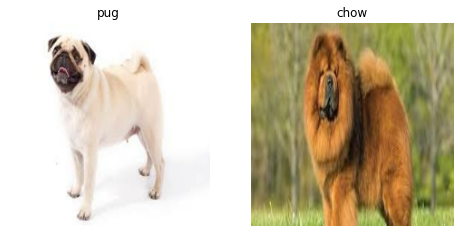

In [ ]:
## working model demo

## importing required library
import tensorflow as tf
import tensorflow_hub as hub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,datetime
from IPython.display import Image

## give path of images u wanna predict
img=[]
path1="/content/drive/My Drive/pug.jpg"
img.append(path1)
path2="/content/drive/My Drive/dog/chowchow.jpg"
img.append(path2)
img

##convert images to batches

## coverting all images to jpeg in rgb channel only and then to float and of size (224,224)
## used inside batch

def path_to_image(i):
  img=tf.io.read_file(i)
  img=tf.image.decode_jpeg(img,channels=3)
  img=tf.image.convert_image_dtype(img,dtype=tf.float32)
  img=tf.image.resize(img,size=(224,224))
  return img

## batch function
def create_test_image_batch(x):
  data=tf.data.Dataset.from_tensor_slices((tf.constant(x)))
  databatch=data.map(path_to_image).batch(32)
  return databatch

## calling batch function
test_batch=create_test_image_batch(img)




##loading model
model=tf.keras.models.load_model("/content/drive/My Drive/dog/models/full-model.h5",custom_objects={"KerasLayer":hub.KerasLayer})

##predicting

result=model.predict(test_batch,verbose=1)

##showing result
answers=[]
for i in range(len(img)):
  
  answers.append(unique_breed_name[result[i].argmax()])


custom_images=[]
for i in test_batch.unbatch().as_numpy_iterator():
  custom_images.append(i)

fig,ax=plt.subplots(1,len(img),figsize=(8,8))

for i,image in enumerate(custom_images):
  ax[i].imshow(image)
  ax[i].set(title=answers[i])
  ax[i].axis("off")

